<a href="https://colab.research.google.com/github/zaghluldinilhaq/Pembelajaranmesin-ZaghlulDinilhaq-2211533024/blob/main/Pratikum_ML_Pekan_ke_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

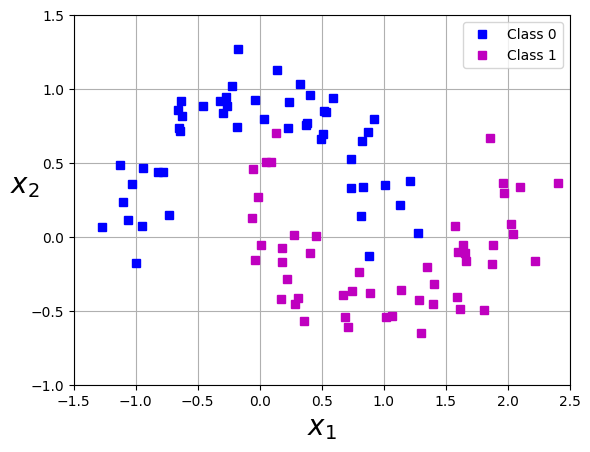

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):

    plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", label='Class 0')  # blue squares for class 0
    plt.plot(x[y == 1, 0], x[y == 1, 1], "ms", label='Class 1')  # magenta squares for class 1

    plt.axis(axes)
    plt.grid(True, which='both')

    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

    plt.legend()

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
def plot_predictions(clf, axes):

    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [12]:

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))

polynomial_svm_clf.fit(x,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

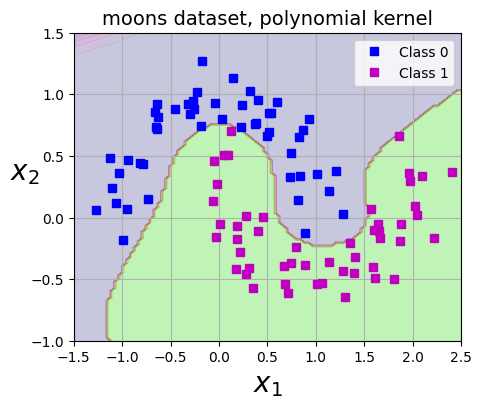

In [14]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title("moons dataset, polynomial kernel", fontsize=14)
plt.show()